In [4]:
import numpy as np
from scipy.stats import beta
from matplotlib import pyplot as plt

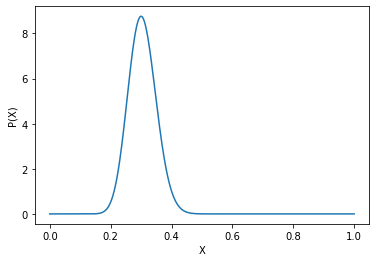

In [55]:
N0 = 70
N1 = 30
dist = beta(N1 + 1, N0 + 1)
xs = np.linspace(0, 1, 1000)
plt.xlabel("X")
plt.ylabel("P(X)")
plt.plot(xs, dist.pdf(xs))

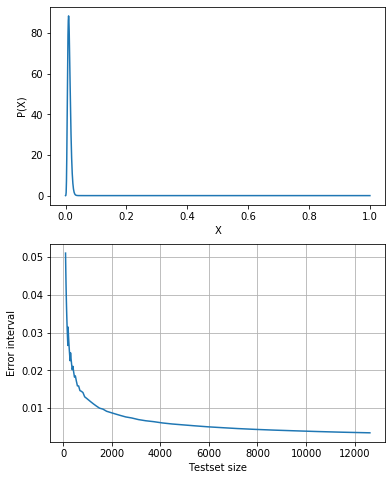

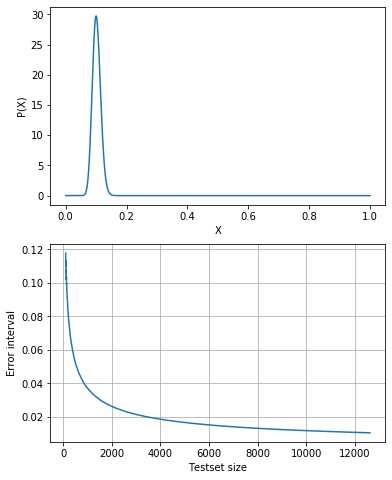

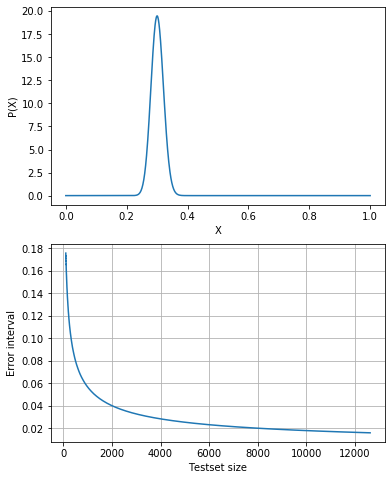

In [61]:
def get_interval(N0, N1, prob=0.95):
    dist = beta(N1 + 1, N0 + 1)
    low = dist.ppf((1 - prob) / 2)
    high = dist.ppf(prob + (1 - prob) / 2)
    interval = high - low
    return interval

def plot_for_error(error):
    dataset_sizes = (100 + 1.1 ** np.arange(100)).astype(np.int)
    intervals = [get_interval(size - int(size * error), int(size * error)) for size in dataset_sizes]
    
    fig = plt.figure(figsize=(6, 8))
    axs = fig.subplots(2, 1)
    
    size = 500
    dist = beta(int(size * error) + 1, size - int(size * error) + 1)
    xs = np.linspace(0, 1, 1000)
    #axs[0].set_title("Error distribution for size {}\nMean error {}".format(size, error))
    axs[0].set_xlabel("X")
    axs[0].set_ylabel("P(X)")
    axs[0].plot(xs, dist.pdf(xs))
    
    #axs[1].set_title("Error interval\nMean error {}".format(error))
    axs[1].set_xlabel("Testset size")
    axs[1].set_ylabel("Error interval")
    axs[1].grid(True)
    axs[1].plot(dataset_sizes, intervals)
    plt.show()
    
plot_for_error(0.01)
plot_for_error(0.10)
plot_for_error(0.30)